# Dataset 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as ascii 
import scipy.optimize as so
%matplotlib inline

In [2]:
data = ascii.read('part1_dataset2_0.dat')
t=data['Time']    # time in seconds
      
R1=data['R1'];R2=data['R2'];R3=data['R3'];R4=data['R4'];
e_R1=data['e_R1'];e_R2=data['e_R2'];e_R3=data['e_R3'];e_R4=data['e_R4'];

N=t.shape[0]
a=0
for i in range(N-1):
    a=a+(t[i+1]-t[i])
t_interval=(a/(N-1))


R=[R1,R2,R3,R4]/t_interval
e_R=[e_R1,e_R2,e_R3,e_R4]/t_interval

dis=np.array([0.0500,0.1000,0.1800,0.3000])  #distance from source in meters
e_dis=0.0005          #uncertainty in distance from source       in meters

cross_section=0.0003142  # in meters squared
e_cross_section=0.0000001  

In [3]:
   # ~~~~~~~weighted~~~~~~~~ 

def least_squares(x,y,sigma):
    S=np.sum(1/(sigma**2))
    Sx=np.sum(x/(sigma**2))
    Sy=np.sum(y/(sigma**2))
    Sxy=np.sum((x*y)/(sigma**2))
    Sxx=np.sum((x**2)/(sigma**2))
    m_leastsquares=((S*Sxy)-(Sx*Sy))/((S*Sxx)-(Sx**2))
    b_leastsquares=((Sxx*Sy)-(Sx*Sxy))/((S*Sxx)-(Sx**2))
    return m_leastsquares,b_leastsquares

In [4]:
def bootstrap(x,y,sigma,nstep=1e4):
    m,b=least_squares(x,y,sigma)
    y_new=m*x+b
    y_resid=y-y_new
    N=x.shape[0]
    marray=[]
    barray=[]
    for q in np.arange(nstep):
        idx=np.random.randint(0,N,N)
        y_boot=y_resid[idx]+y_new
        m,b=least_squares(x,y_boot,sigma[idx])
        marray.append(m)
        barray.append(b)
    return marray,barray

# (1)

In [5]:
lsdecay_single=np.zeros(4)   
lsA0_single=np.zeros(4)


for i in range(4):

    a,b=least_squares(t,np.log(R[i]),(e_R[i]/R[i]))
    lsdecay_single[i]=(-a)
    lsA0_single[i]=np.exp(b)

    print("decay constant:","{:.6f}".format(lsdecay_single[i]),"  half life:","{:.3f}".format(np.log(2)/(-a)),
          "  inital activity","{:.3f}".format(lsA0_single[i]),"  Dectector",i+1)


decay constant: 0.014860   half life: 46.646   inital activity 2453.069   Dectector 1
decay constant: 0.015224   half life: 45.530   inital activity 626.263   Dectector 2
decay constant: 0.014953   half life: 46.354   inital activity 191.169   Dectector 3
decay constant: 0.015095   half life: 45.920   inital activity 69.819   Dectector 4


clearly multiple isotopes


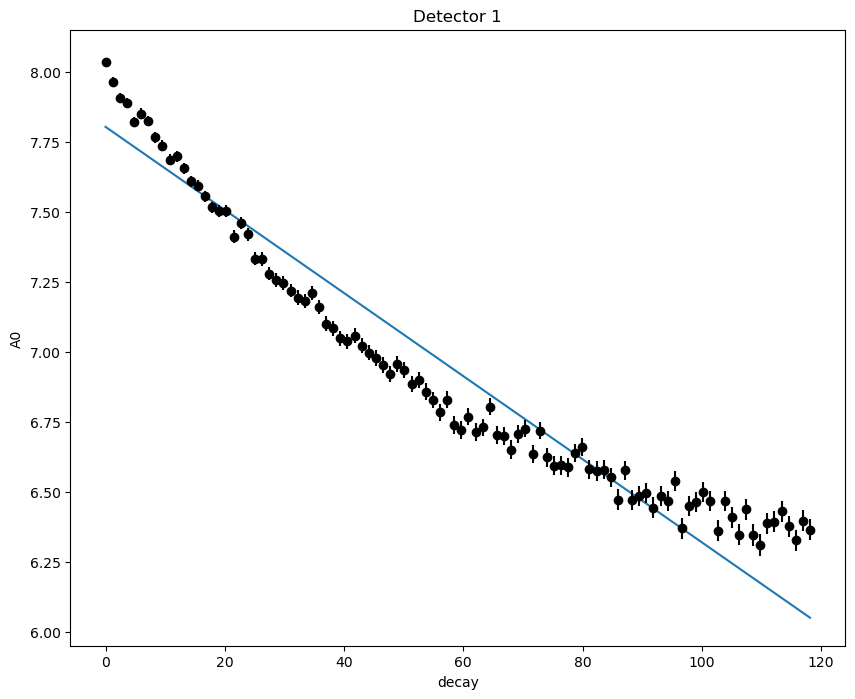

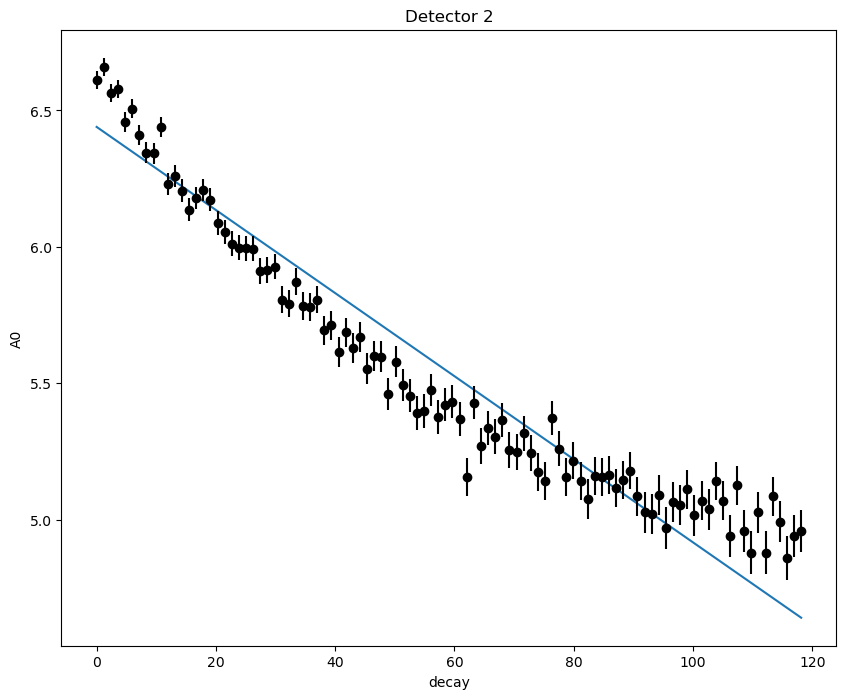

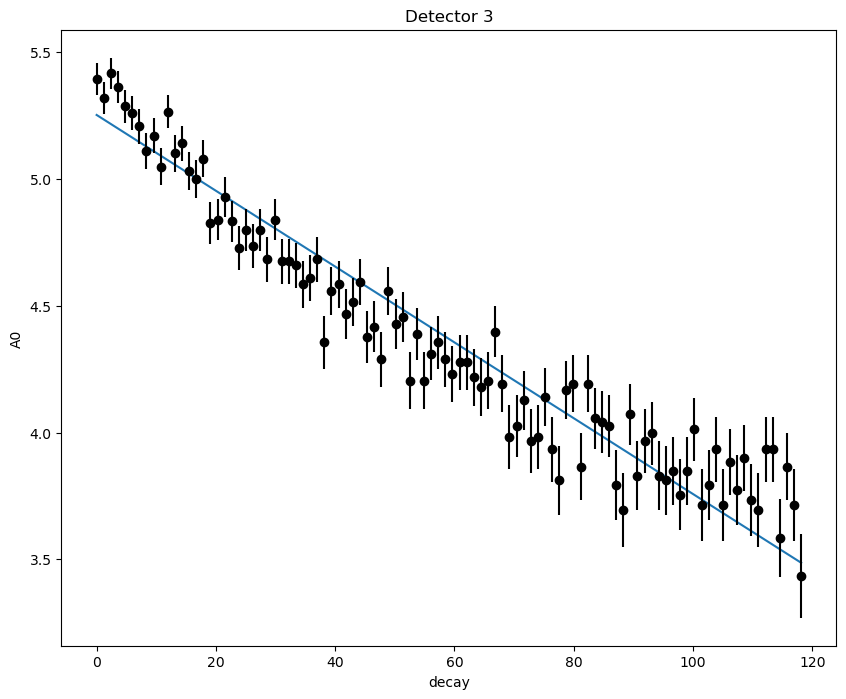

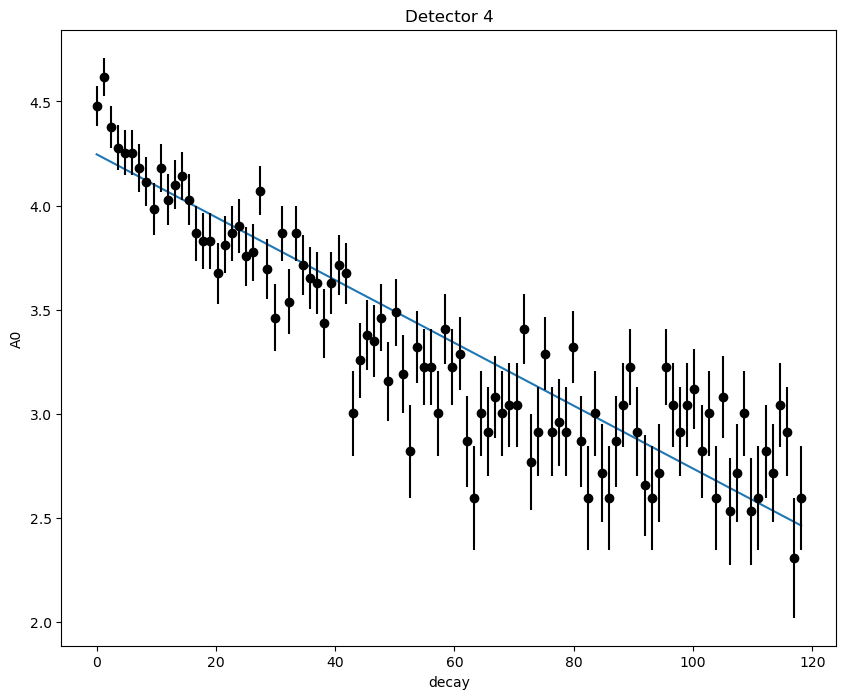

In [6]:
for i in range(4):
    y1=np.log(lsA0_single[i])-(lsdecay_single[i]*t)
    
    fig,ax=plt.subplots(1 , figsize=(10,8))    
    ax.set_ylabel('A0')
    ax.set_xlabel('decay')
    plt.title(f"Detector {i+1}")
    plt.plot(t,y1)
    plt.errorbar(t,np.log(R[i]),yerr=(e_R[i]/R[i]),fmt='ko')
    
    
    
print( "clearly multiple isotopes")

# (2)

detector 1
A0 = 2422.069158437986 -17.0 + 18.0
and decay = 0.0151 -0.0001400 + 0.0001500
min chi2 is 2067.99
AIC is  2071.992501927846
BIC is  2077.2028422998224



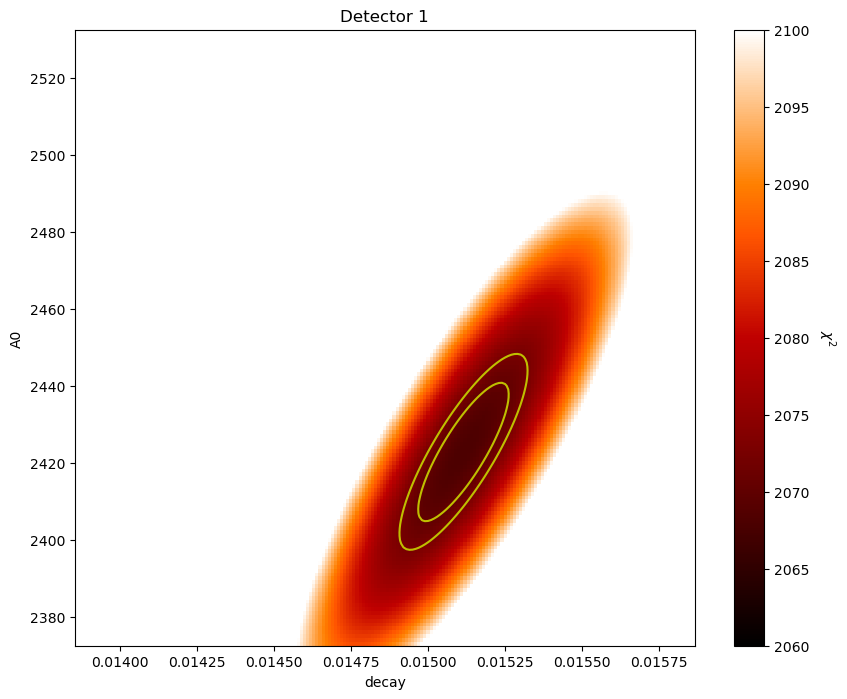

<Figure size 640x480 with 0 Axes>

detector 2
A0 = 617.2633706246177 -8.0 + 9.0
and decay = 0.0155 -0.0002500 + 0.0003000
min chi2 is 598.44
AIC is  602.4414377810666
BIC is  607.6517781530428



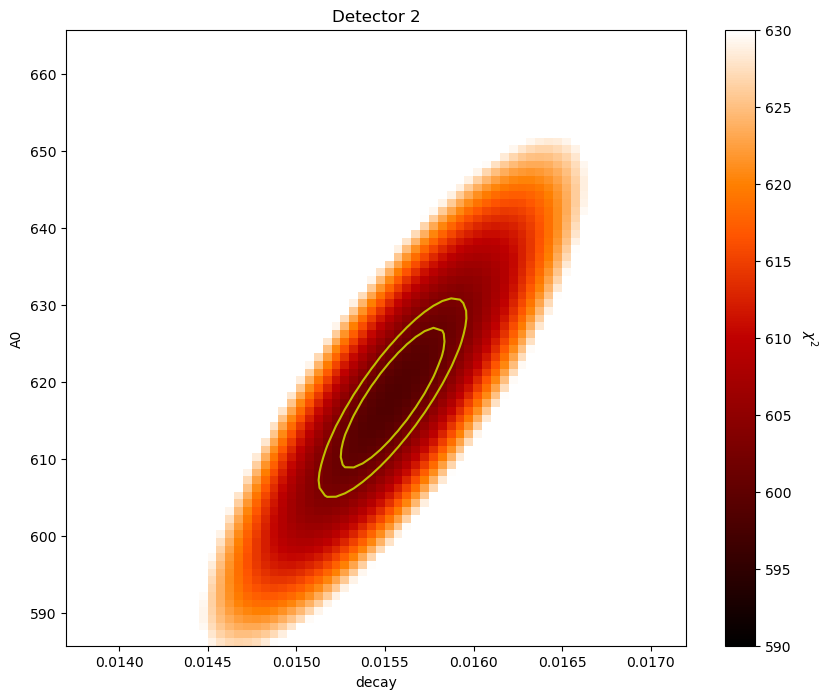

<Figure size 640x480 with 0 Axes>

detector 3
A0 = 189.16863321934048 -5.0 + 4.0
and decay = 0.0153 -0.0005000 + 0.0005000
min chi2 is 179.96
AIC is  183.96224398756985
BIC is  189.17258435954602



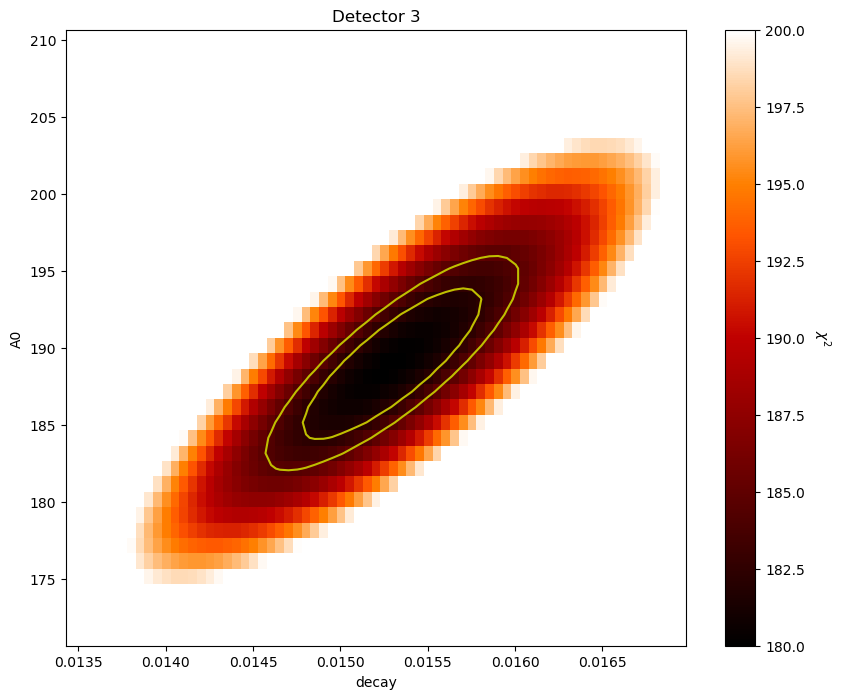

<Figure size 640x480 with 0 Axes>

detector 4
A0 = 68.31850808803854 -3.0 + 3.0
and decay = 0.0162 -0.0008500 + 0.0009000
min chi2 is 169.14
AIC is  173.13687364551782
BIC is  178.347214017494



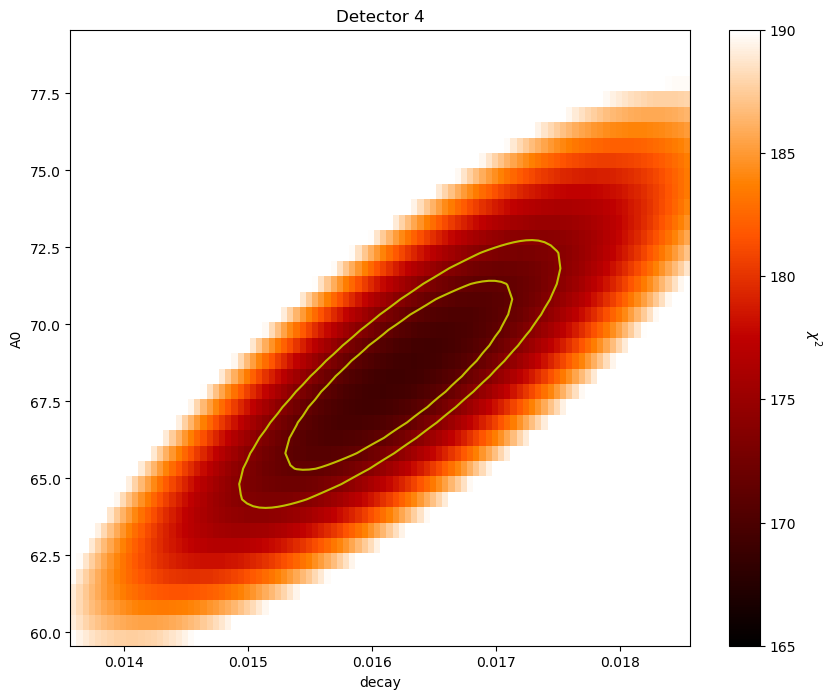

<Figure size 640x480 with 0 Axes>

In [57]:
chi2A0=np.zeros(4)
e_chi2A0=np.zeros(4)
chi2decay=np.zeros(4)
e_chi2decay=np.zeros(4)

for w in range(4):
    if w==0:
        A0_grid=np.arange(lsA0_single[w]-80,lsA0_single[w]+80,1)
        decay_grid=np.arange(lsdecay_single[w]-0.001,lsdecay_single[w]+0.001,0.00001)
    elif w==1:
        A0_grid=np.arange(lsA0_single[w]-40,lsA0_single[w]+40,1)
        decay_grid=np.arange(lsdecay_single[w]-0.0015,lsdecay_single[w]+0.002,0.00005)
    elif w==2:
        A0_grid=np.arange(lsA0_single[w]-20,lsA0_single[w]+20,1)
        decay_grid=np.arange(lsdecay_single[w]-0.0015,lsdecay_single[w]+0.002,0.00005)
    else:
        A0_grid=np.arange(lsA0_single[w]-10,lsA0_single[w]+10,0.5)
        decay_grid=np.arange(lsdecay_single[w]-0.0015,lsdecay_single[w]+0.0035,0.00005)


    chi2grid=np.empty([A0_grid.shape[0],decay_grid.shape[0]])


    for i,A0 in enumerate(A0_grid):
        for k,decay in enumerate(decay_grid):
            y=A0*np.exp(-(decay*t))
            chi2grid[i][k]=np.sum((((R[w])-y)**2)/((e_R[w])**2))

    fig,ax=plt.subplots(1 , figsize=(10,8))
    ax.set_ylabel('A0')
    ax.set_xlabel('decay')
    plt.title(f"Detector {w+1}")
    
    if w==0:
        tmp=ax.pcolormesh(decay_grid,A0_grid,chi2grid,cmap=plt.get_cmap('gist_heat'),vmin=2060,vmax=2100)
    elif w==1:
        tmp=ax.pcolormesh(decay_grid,A0_grid,chi2grid,cmap=plt.get_cmap('gist_heat'),vmin=590,vmax=630)
    elif w==2:
        tmp=ax.pcolormesh(decay_grid,A0_grid,chi2grid,cmap=plt.get_cmap('gist_heat'),vmin=180,vmax=200)
    else:
        tmp=ax.pcolormesh(decay_grid,A0_grid,chi2grid,cmap=plt.get_cmap('gist_heat'),vmin=165,vmax=190)
        
  
    cbar=fig.colorbar(tmp)
    cbar.set_label('$\chi^2$', labelpad=20, rotation=270)

    g=[2.3+np.min(chi2grid),4.61+np.min(chi2grid)]
    plt.contour(decay_grid,A0_grid,chi2grid,g,colors='y')
    #print("min chi2 is","{:.2f}".format(np.min(chi2grid)))
    
   
    ind = np.unravel_index(np.argmin(chi2grid), chi2grid.shape)
    print("detector",w+1)
    p=np.min(chi2grid)
    f=[]
    g=[]
    for i in np.arange(A0_grid.shape[0]-1): 
        for k in np.arange(decay_grid.shape[0]-1):
            if (2.295>(chi2grid[i][k]-p)<2.305):
                f.append(i)      #min and max uncertainty index value of Omega0
                g.append(k)     #min and max uncertainty index value of H0


    A0minind=min(f);A0maxind=max(f)
    decayminind=min(g);decaymaxind=max(g)
    print("A0 =",A0_grid[ind[0]],
          A0_grid[A0minind]-A0_grid[ind[0]],
          "+",(A0_grid[A0maxind]-A0_grid[ind[0]]))



    print("and decay =","{:.4f}".format(decay_grid[ind[1]]),
          "{:.7f}".format(decay_grid[decayminind]-decay_grid[ind[1]]),
          "+","{:.7f}".format((decay_grid[decaymaxind]-decay_grid[ind[1]])))

    print("min chi2 is","{:.2f}".format(np.min(chi2grid)))
    
    chi2A0[w]=A0_grid[ind[0]] ;e_chi2A0[w]=(abs(A0_grid[A0minind]-A0_grid[ind[0]])+abs(A0_grid[A0maxind]-A0_grid[ind[0]]))/2
    
    chi2decay[w]=decay_grid[ind[1]] ;e_chi2decay[w]=(abs(decay_grid[decayminind]-decay_grid[ind[1]])+abs((decay_grid[decaymaxind]-decay_grid[ind[1]])))/2
    
    para=2  #number of parameters
    AIC=np.min(chi2grid)+2*para  #Akaike Information Criterion
    print("AIC is ", AIC)

    N=t.shape[0] #number of data points 
    BIC=np.min(chi2grid)+(np.log(N)*para) #Bayesian Information Criterion
    print("BIC is ", BIC)
    print("")
    plt.figure()
    plt.show()

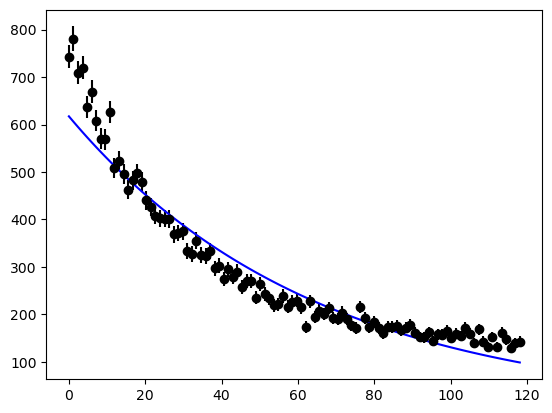

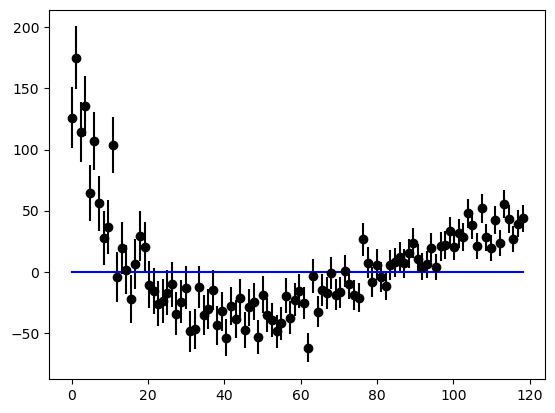

In [61]:
i=1
plt.errorbar(t,R[i],yerr=(e_R[i]),fmt='ko')
y1=chi2A0[i]*np.exp(-(chi2decay[i]*t))
plt.plot(t,y1,'b')
plt.show()

plt.errorbar(t,R[i]-y1,yerr=(e_R[i]),fmt='ko')
o=[0]*t.shape[0]
plt.plot(t,o,'b')




# (3)

In [8]:
def activity_equation(t,lamda1,lamda2,A01,A02):
    A1=A01*np.exp(-lamda1*t)
    A2=A02*np.exp(-lamda2*t)
    A=A1+A2
    return A

In [9]:
 # curve fit data 


cfdecay1=np.zeros(4)
cfdecay2=np.zeros(4)
cfA01=np.zeros(4)
cfA02=np.zeros(4)

for i in range(4):

    g=np.array([lsdecay_single[i]*0.9,lsdecay_single[i]*1.1,lsA0_single[i]/2.5,lsA0_single[i]/1.5])

    
    
    u,v=so.curve_fit(activity_equation,t,R[i],g,sigma=e_R[i])
    cfdecay1[i],cfdecay2[i],cfA01[i],cfA02[i]=u
    print('detector',i+1)
    print("")
    print('decay 1: %.4f' %(cfdecay1[i]))
    print('A0 1: %.4f' %(cfA01[i]))
    print("half life:","{:.3f}".format(np.log(2)/(cfdecay1[i])))
    print('decay 2: %.4f' %(cfdecay2[i]))
    print('A0 2: %.4f' %(cfA02[i]))
    print("half life:","{:.3f}".format(np.log(2)/(cfdecay2[i])))
    print("")



detector 1

decay 1: 0.0032
A0 1: 803.8235
half life: 214.762
decay 2: 0.0387
A0 2: 2190.3459
half life: 17.892

detector 2

decay 1: 0.0030
A0 1: 191.6421
half life: 232.518
decay 2: 0.0384
A0 2: 571.2974
half life: 18.060

detector 3

decay 1: 0.0062
A0 1: 80.9593
half life: 111.865
decay 2: 0.0394
A0 2: 143.5474
half life: 17.611

detector 4

decay 1: 0.0010
A0 1: 16.0931
half life: 668.853
decay 2: 0.0362
A0 2: 68.0840
half life: 19.127



clearly multiple isotopes


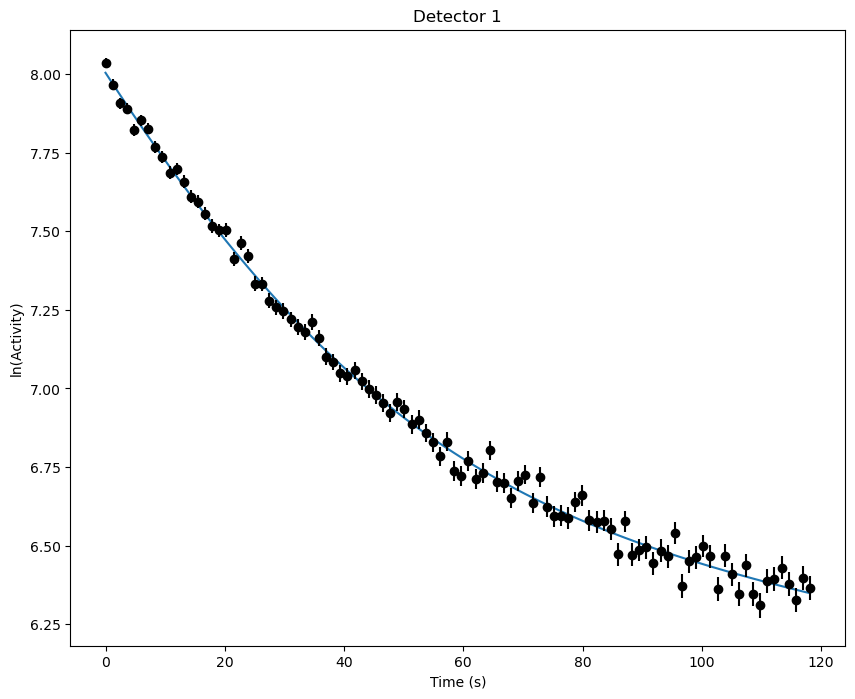

<Figure size 640x480 with 0 Axes>

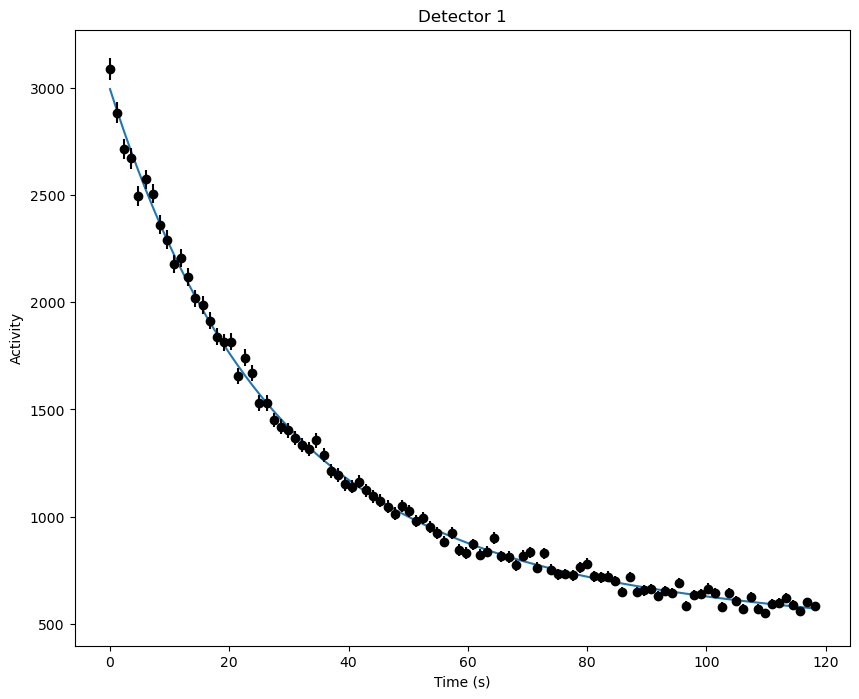

<Figure size 640x480 with 0 Axes>

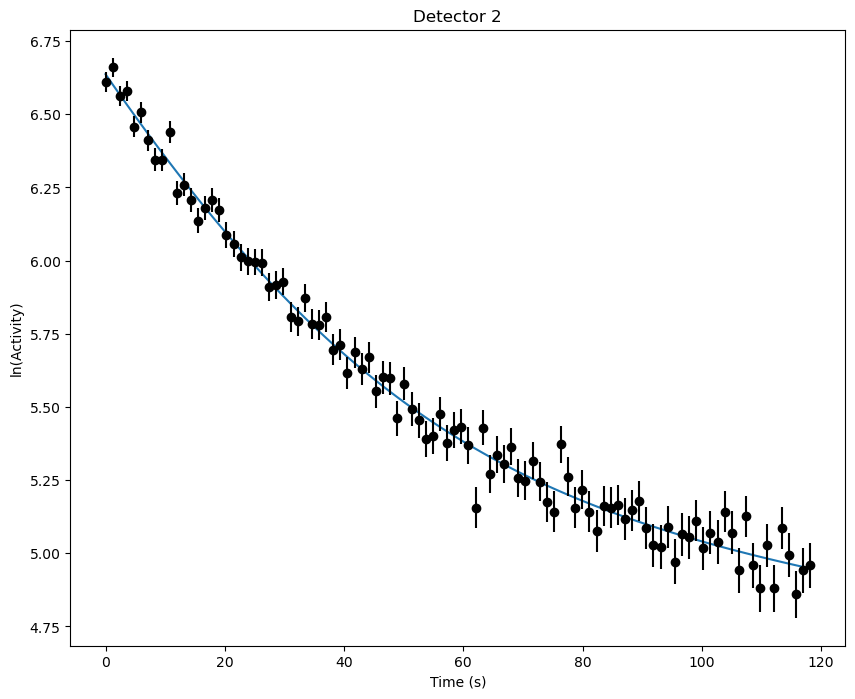

<Figure size 640x480 with 0 Axes>

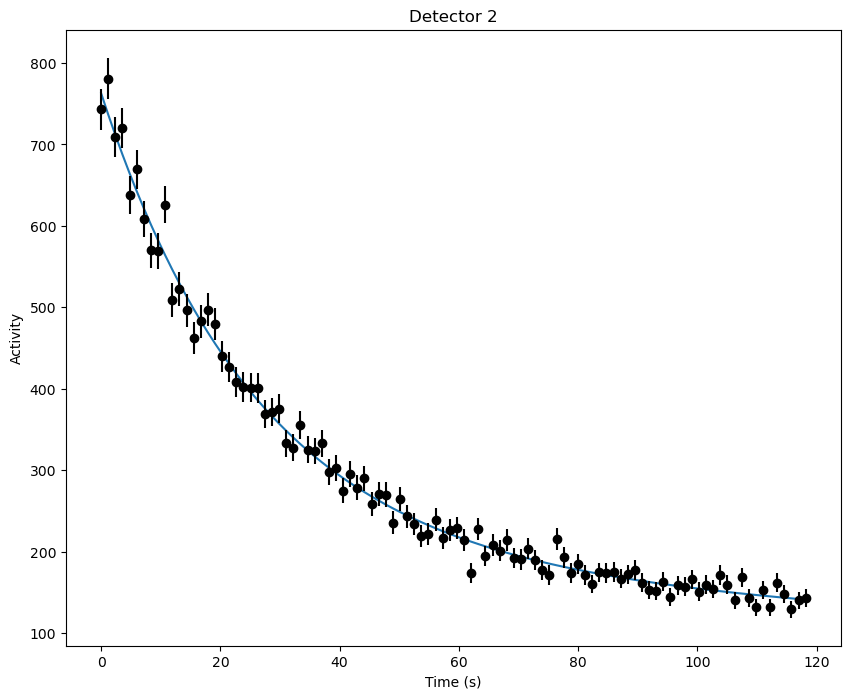

<Figure size 640x480 with 0 Axes>

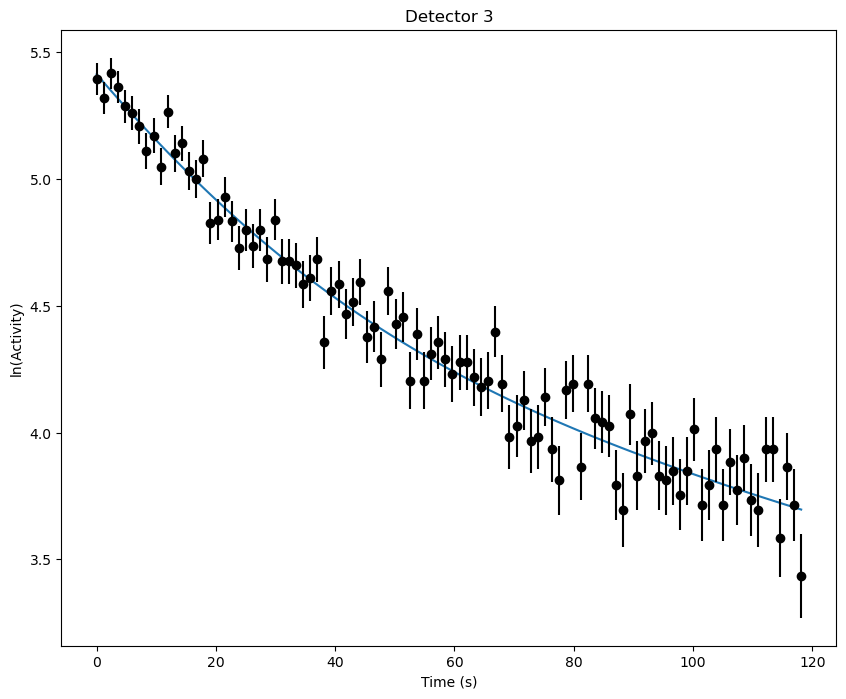

<Figure size 640x480 with 0 Axes>

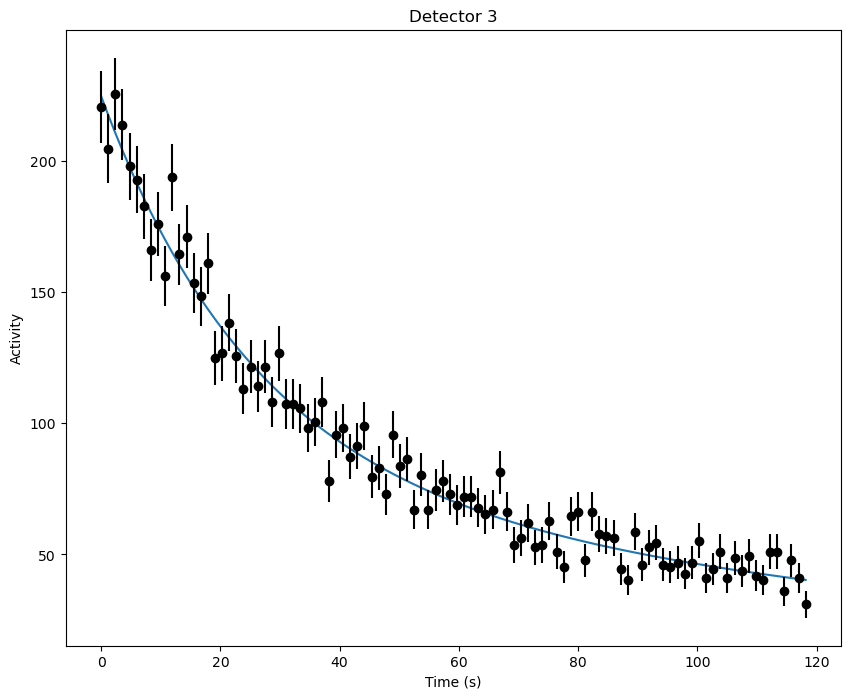

<Figure size 640x480 with 0 Axes>

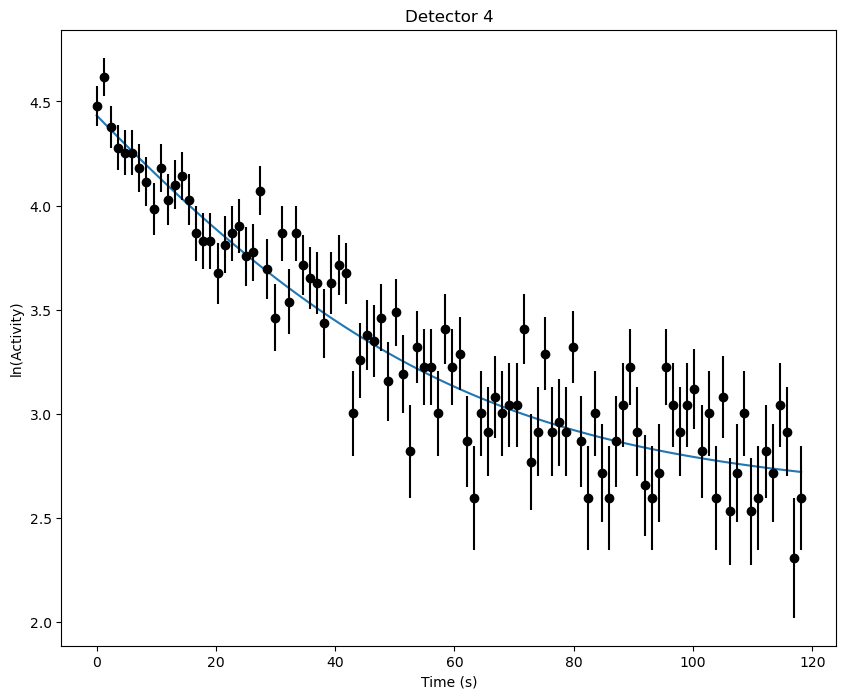

<Figure size 640x480 with 0 Axes>

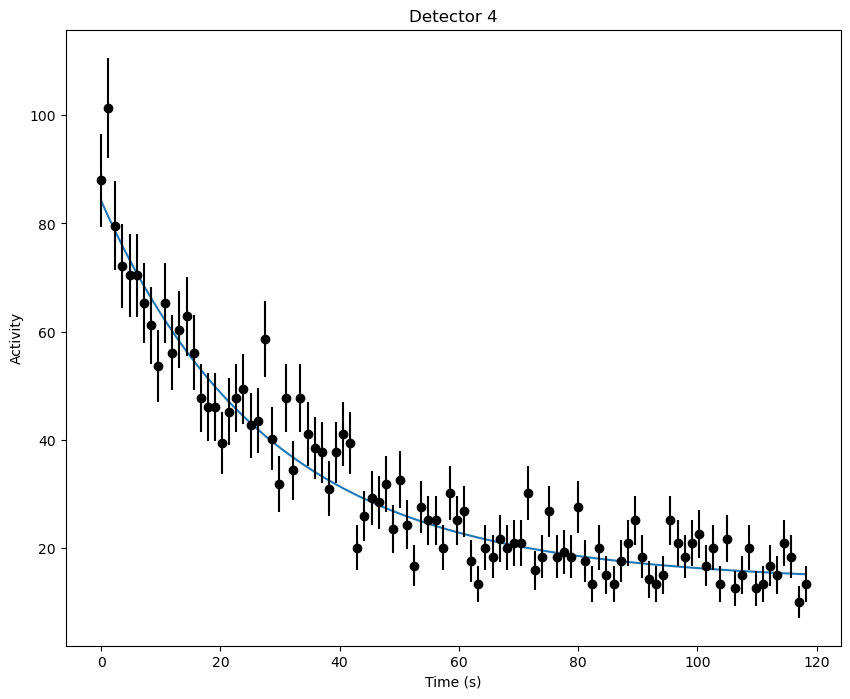

<Figure size 640x480 with 0 Axes>

In [10]:
print( "clearly multiple isotopes")
for i in range(4):
    y1=np.exp(np.log(cfA01[i])-(cfdecay1[i]*t))
    y2=np.exp(np.log(cfA02[i])-(cfdecay2[i]*t))
    lny=np.log(y1+y2)


    fig,ax=plt.subplots(1 , figsize=(10,8))
    plt.plot(t,lny)
    plt.errorbar(t,np.log(R[i]),yerr=(e_R[i]/R[i]),fmt='ko')

    ax.set_ylabel('ln(Activity)')
    ax.set_xlabel('Time (s)')
    plt.title(f"Detector {i+1}")

    plt.figure()

    y1=cfA01[i]*np.exp(-(cfdecay1[i]*t))
    y2=cfA02[i]*np.exp(-(cfdecay2[i]*t))
    y=y1+y2

    fig,ax=plt.subplots(1 , figsize=(10,8)) 
    plt.plot(t,y)
    plt.errorbar(t,(R[i]),yerr=(e_R[i]),fmt='ko')

    ax.set_ylabel('Activity')
    ax.set_xlabel('Time (s)')
    plt.title(f"Detector {i+1}")

    plt.show()
    plt.figure()


# (4)

In [11]:
'''
mcmc:  function to perform a simple MCMC using the Metropolis-Hastings Algorithm

Inputs:
func  - the function to be used for fitting. Function should accept 2 inputs
        the first is the x-values at which the model is calculated, the second
        is a numpy array for the parameters.
x     - the x-values at which the model should be calculated (numpy array)
y     - the value of the data for each x (numpy array)
sig   - the uncertainty on y (numpy array)
pars0 - The initial parameters from which to start the MCMC chain (numpy array)
stepsize - the stepsize for each of the parameters (numpy array)
nstep    - the number of steps in the MCMC chain

Outputs:
chain    - The MCMC chain as a (Nsteps, Npars) numpy array
'''
def mcmc(func,x,y,sig,pars0,stepsize,nstep=1e2):
    nstep=int(nstep)     #ensures that both axis are integers
    npars=pars0.shape[0] #size of one axis based on number of initial parameters
    chain=np.zeros((int(nstep),npars)) # 2d array 
    chi2=np.zeros(int(nstep))

    chain[0,:]=pars0.copy() #inserts the initial parametersto the begining of chain 
    mdl=func(x, *pars0)   #model for chi squared
    chi2[0]=np.sum( (y-mdl)**2/sig**2) # chi0^2 equation for the initial parameters
    njump=0               #counter for if jump occurs
    for i in range(1,nstep):
        pars_new=abs(np.random.normal(chain[i-1,:],stepsize))
        mdl=func(x,*pars_new)
        chi2_new=np.sum( (y-mdl)**2/sig**2)  #chi2 at new location
        if (chi2_new > chi2[i-1]):  #if new chi2 is bigger than old continue
            p0=np.exp(-(chi2_new-chi2[i-1])/2.) # probability of jumping to new location
            p=np.random.uniform(0,1,1)  #random number between 1 and zero
            if  p<=p0:  #if p<=p0 all variables are locked in and the jump counter increments
                chain[i,:]=pars_new
                chi2[i]=chi2_new
                njump=njump+1
            else:    # else variables remain constant
                chain[i,:]=chain[i-1,:]
                chi2[i]=chi2[i-1]
        else: # if the new chi2 is smaller than old, all variables are locked in and the jump counter increments
            chain[i,:]=pars_new
            njump=njump+1
            chi2[i]=chi2_new
    print('Jump fraction: %.3f' %(njump/nstep))
    chain2=np.transpose(chain)      # transpose the array so that the updated parameters of one kind are are all in an indiviual array
    return chain2

In [30]:
mcdecay1=[[], [], [], []]
mcdecay2=[[], [], [], []]
mcA01=[[], [], [], []]
mcA02=[[], [], [], []]


In [31]:

a=np.mean(mcA01[i]) # check to ensure i dont over fill arrays
for q in range(5):
    
 for i in range(4):
    
    intpara=np.array([cfdecay1[0],cfdecay2[0],cfA01[i],cfA02[i]])# initial parameters
    #intpara=np.array([lsdecay_single[i],lsdecay_single[i],lsA0_single[i]/1.5,lsA0_single[i]/2.5]) # alternet start values
    
    if i==0:
        u=np.array([0.02,0.009,0.02,0.009]) # scaling the step size
    elif i==1:
        u=np.array([0.02,0.009,0.04,0.015])
    elif i==2:
        u=np.array([0.02,0.04,0.06,0.04])
    else:
        u=np.array([0.015,0.11,0.08,0.07])
        
        
    parastepsize=np.array([cfdecay1[i],cfdecay2[i],cfA01[i],cfA02[i]])*u # step size per parameter
    #print(cfdecay1[i])
    #print(intpara)
    #print(parastepsize)

    x=mcmc(activity_equation,t,(R[i]),(e_R[i]),intpara,parastepsize,nstep=5e4)

    a=int(x[0].shape[0]) #to burn the first 10% of values
    b=a*0.2
    
    mcdecay1[i].append(x[0][int(b):])
    mcdecay2[i].append(x[1][int(b):])
    mcA01[i].append(x[2][int(b):])
    mcA02[i].append(x[3][int(b):])
    
    
    
    
print("complete")
    #"wanted: jump %age of 15 to 20, alter step size")

C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Jump fraction: 0.165
Jump fraction: 0.208
Jump fraction: 0.184
Jump fraction: 0.170
Jump fraction: 0.166
Jump fraction: 0.189
Jump fraction: 0.173
Jump fraction: 0.212
Jump fraction: 0.166
Jump fraction: 0.203
Jump fraction: 0.176
Jump fraction: 0.211
Jump fraction: 0.166
Jump fraction: 0.222
Jump fraction: 0.199
Jump fraction: 0.161
Jump fraction: 0.167
Jump fraction: 0.208
Jump fraction: 0.198
Jump fraction: 0.193
complete


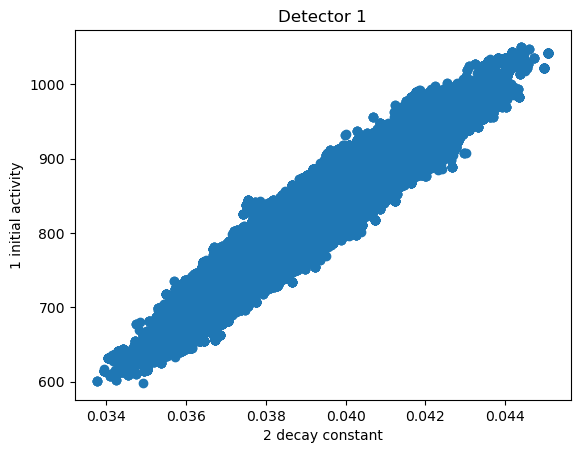

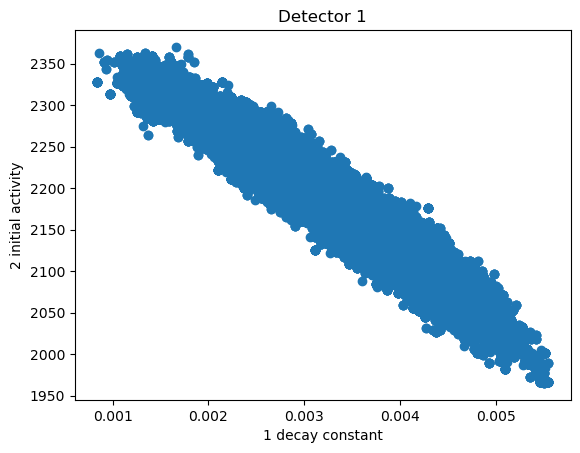

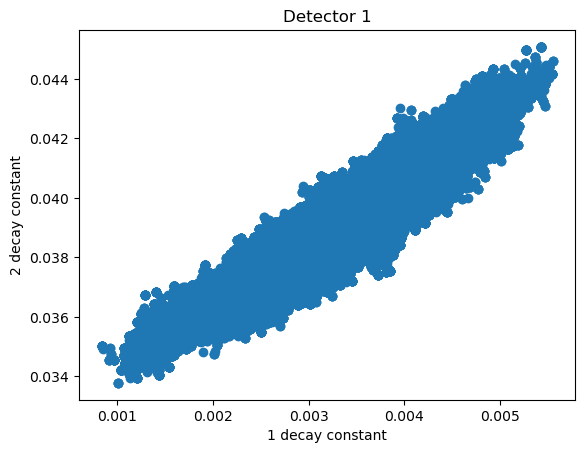

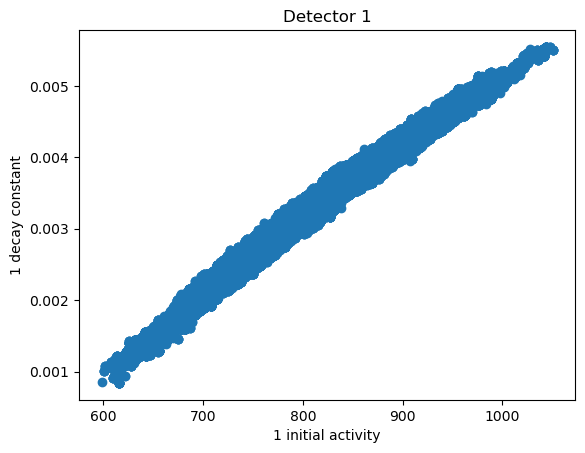

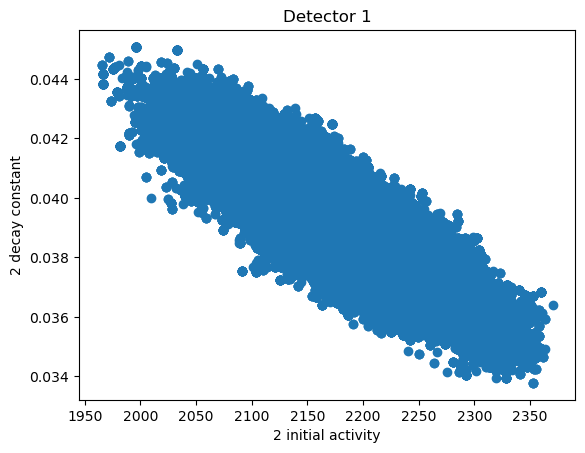

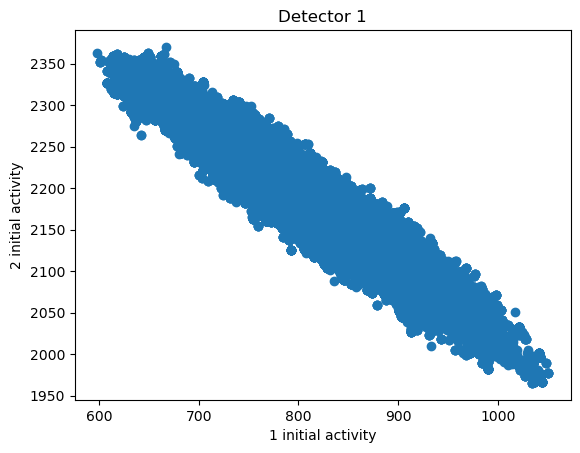

<Figure size 640x480 with 0 Axes>

In [41]:
i=0         #change this value to out put a different detector
plt.scatter(mcdecay2[i],mcA01[i])
plt.xlabel('2 decay constant')
plt.ylabel('1 initial activity')
plt.title(f"Detector {i+1}")
plt.figure()
plt.scatter(mcdecay1[i],mcA02[i])
plt.xlabel('1 decay constant')
plt.ylabel('2 initial activity')
plt.title(f"Detector {i+1}")
plt.figure()
plt.scatter(mcdecay1[i],mcdecay2[i])
plt.xlabel('1 decay constant')
plt.ylabel('2 decay constant')
plt.title(f"Detector {i+1}")
plt.figure()
plt.scatter(mcA01[i],mcdecay1[i])
plt.xlabel('1 initial activity')
plt.ylabel('1 decay constant')
plt.title(f"Detector {i+1}")
plt.figure()
plt.scatter(mcA02[i],mcdecay2[i])
plt.xlabel('2 initial activity')
plt.ylabel('2 decay constant')
plt.title(f"Detector {i+1}")
plt.figure()
plt.scatter(mcA01[i],mcA02[i])
plt.xlabel('1 initial activity')
plt.ylabel('2 initial activity')
plt.title(f"Detector {i+1}")
plt.figure()
plt.show()

           ~~~~~~~~~Detector 1 ~~~~~~~~~~~~


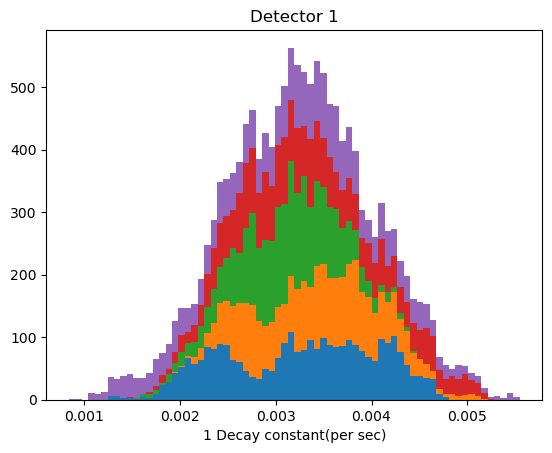

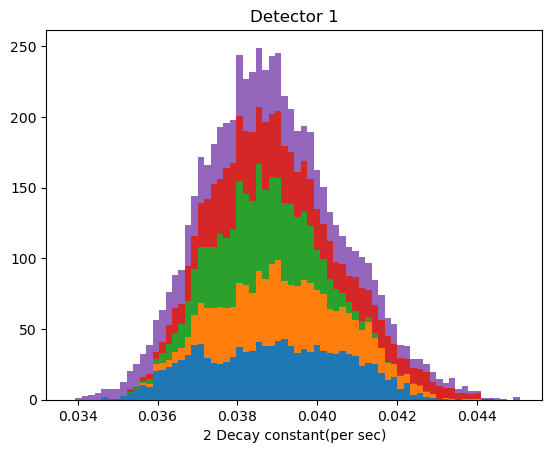

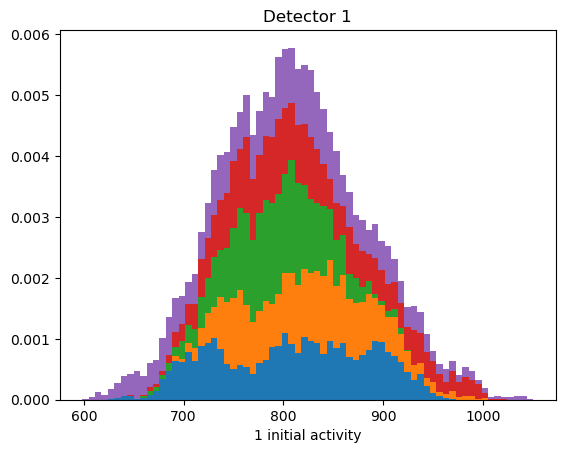

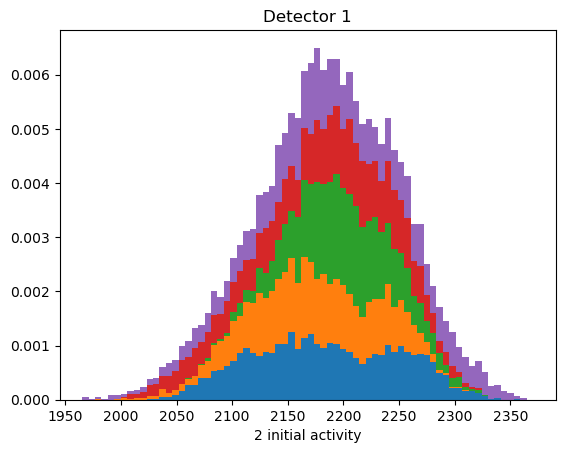

In [40]:
i=0      #change this value to out put a different detector
print("           ~~~~~~~~~Detector",i+1,"~~~~~~~~~~~~")
plt.hist(mcdecay1[i],bins=70,density=True,stacked=True)
plt.xlabel('1 Decay constant(per sec)')
plt.title(f"Detector {i+1}")
plt.figure()
plt.hist(mcdecay2[i],bins=70,density=True,stacked=True)
plt.xlabel('2 Decay constant(per sec)')
plt.title(f"Detector {i+1}")
plt.figure()
plt.hist(mcA01[i],bins=70,density=True,stacked=True)
plt.xlabel('1 initial activity')
plt.title(f"Detector {i+1}")
plt.figure()
plt.hist(mcA02[i],bins=70,density=True,stacked=True)
plt.xlabel('2 initial activity')
plt.title(f"Detector {i+1}")
plt.show()


In [34]:
for i in range(4):

    print("~~~Detector", i+1,"~~~")
    print("")
    print("initial activity 1:","{:.1f}".format(np.median(mcA01[i])),"±","{:.1f}".format(np.std(mcA01[i])))
    print("decay constant 1:","{:.6f}".format(np.median(mcdecay1[i])),"±","{:.6f}".format(np.std(mcdecay1[i])))
    print("half life 1:","{:.3f}".format(np.log(2)/(np.median(mcdecay1[i]))),"±","{:.3f}".format((np.log(2)/(np.median(mcdecay1[i])**2))*np.std(mcdecay1[i])))
    print("")
    print("initial activity 2:","{:.1f}".format(np.median(mcA02[i])),"±","{:.1f}".format(np.std(mcA02[i])))
    print("decay constant 2:","{:.6f}".format(np.median(mcdecay2[i])),"±","{:.6f}".format(np.std(mcdecay2[i])))
    print("half life 2:","{:.3f}".format(np.log(2)/(np.median(mcdecay2[i]))),"±","{:.3f}".format((np.log(2)/(np.median(mcdecay2[i])**2))*np.std(mcdecay2[i])))
    print("")
    print("")

~~~Detector 1 ~~~

initial activity 1: 806.8 ± 71.8
decay constant 1: 0.003259 ± 0.000755
half life 1: 212.718 ± 49.257

initial activity 2: 2186.9 ± 63.4
decay constant 2: 0.038783 ± 0.001701
half life 2: 17.872 ± 0.784


~~~Detector 2 ~~~

initial activity 1: 208.1 ± 36.5
decay constant 1: 0.003685 ± 0.001594
half life 1: 188.093 ± 81.384

initial activity 2: 557.8 ± 32.2
decay constant 2: 0.039701 ± 0.003395
half life 2: 17.459 ± 1.493


~~~Detector 3 ~~~

initial activity 1: 83.9 ± 23.0
decay constant 1: 0.006496 ± 0.002413
half life 1: 106.703 ± 39.628

initial activity 2: 141.1 ± 21.0
decay constant 2: 0.040506 ± 0.008479
half life 2: 17.112 ± 3.582


~~~Detector 4 ~~~

initial activity 1: 21.5 ± 3.4
decay constant 1: 0.003581 ± 0.001296
half life 1: 193.579 ± 70.072

initial activity 2: 63.9 ± 4.1
decay constant 2: 0.040472 ± 0.004436
half life 2: 17.127 ± 1.877




In [28]:
for i in range(4):

    print("~~~Detector", i+1,"~~~")
    print("")
    print("initial activity 1:","{:.1f}".format(np.mean(mcA01[i])),"±","{:.1f}".format(np.std(mcA01[i])))
    print("decay constant 1:","{:.6f}".format(np.mean(mcdecay1[i])),"±","{:.6f}".format(np.std(mcdecay1[i])))
    print("half life 1:","{:.3f}".format(np.log(2)/(np.mean(mcdecay1[i]))),"±","{:.3f}".format((np.log(2)/(np.mean(mcdecay1[i])**2))*np.std(mcdecay1[i])))
    print("")
    print("initial activity 2:","{:.1f}".format(np.mean(mcA02[i])),"±","{:.1f}".format(np.std(mcA02[i])))
    print("decay constant 2:","{:.6f}".format(np.mean(mcdecay2[i])),"±","{:.6f}".format(np.std(mcdecay2[i])))
    print("half life 2:","{:.3f}".format(np.log(2)/(np.mean(mcdecay2[i]))),"±","{:.3f}".format((np.log(2)/(np.mean(mcdecay2[i])**2))*np.std(mcdecay2[i])))
    print("")
    print("")

~~~Detector 1 ~~~



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (12,) + inhomogeneous part.

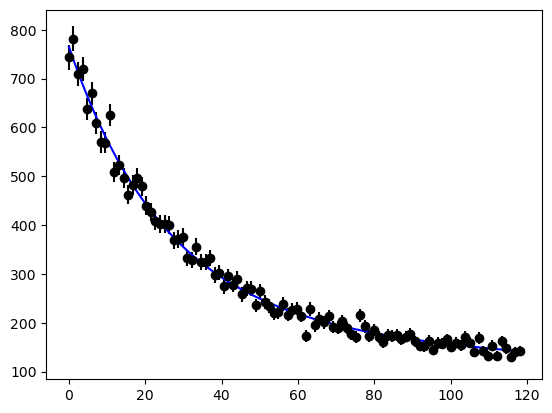

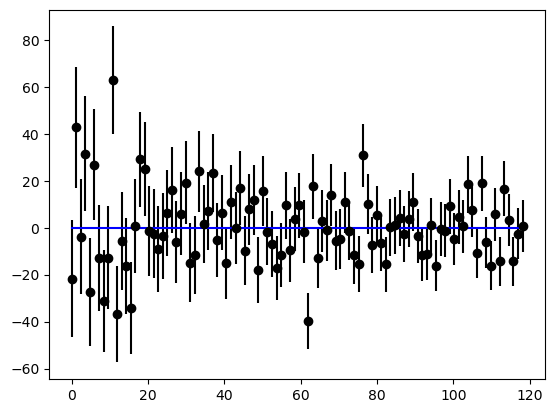

In [62]:
i=1         #change this value to out put a different detector
plt.errorbar(t,R[i],yerr=(e_R[i]),fmt='ko')
y1=np.mean(mcA01[i])*np.exp(-(np.mean(mcdecay1[i])*t))
y2=np.mean(mcA02[i])*np.exp(-(np.mean(mcdecay2[i])*t))
y=y1+y2     
                            
plt.plot(t,y,'b')
plt.show()

plt.errorbar(t,R[i]-y,yerr=(e_R[i]),fmt='ko')
o=[0]*t.shape[0]
plt.plot(t,o,'b')


# (5)

In [18]:
for i in range(4):
    y1=np.mean(mcA01[i])*np.exp(-(np.mean(mcdecay1[i])*t))
    y2=np.mean(mcA02[i])*np.exp(-(np.mean(mcdecay2[i])*t))
    y=y1+y2
    #plt.plot(t,y)
    #plt.errorbar(t,(R[i]),yerr=(e_R[i]),fmt='ko')
    #plt.figure()
    chi2=np.sum((((R[i])-y)**2)/((e_R[i])**2))
    print('detector',i+1)
    print('chi2:',chi2)


    para=4  #number of parameters
    AIC=np.min(chi2)+2*para  #Akaike Information Criterion
    print("AIC is ", AIC)

    N=t.shape[0] #number of data points 
    BIC=np.min(chi2)+(np.log(N)*para) #Bayesian Information Criterion
    print("BIC is ", BIC)
    print("")

detector 1
chi2: 127.78483795542114
AIC is  135.78483795542115
BIC is  146.2055186993735

detector 2
chi2: 96.09190076597939
AIC is  104.09190076597939
BIC is  114.51258150993175

detector 3
chi2: 87.61058254589402
AIC is  95.61058254589402
BIC is  106.03126328984638

detector 4
chi2: 108.49713735548403
AIC is  116.49713735548403
BIC is  126.9178180994364



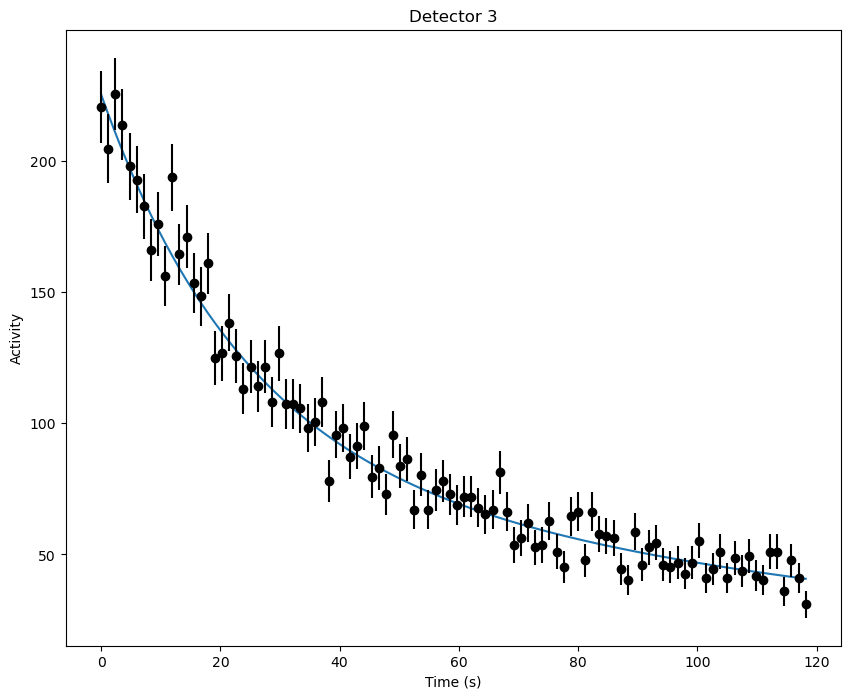

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
i=2          #change this value to out put a different detector
y1=np.exp(np.log(np.mean(mcA01[i]))-(np.mean(mcdecay1[i])*t))
y2=np.exp(np.log(np.mean(mcA02[i]))-(np.mean(mcdecay2[i])*t))
lny=np.log(y1+y2)


#fig,ax=plt.subplots(1 , figsize=(10,8))
#plt.plot(t,lny)


#plt.errorbar(t,np.log(R[i]),yerr=(e_R[i]/R[i]),fmt='ko')

#ax.set_ylabel('ln(Activity)')
#ax.set_xlabel('Time (s)')
#plt.title(f"Detector {i+1}")

#plt.figure()

y1=np.mean(mcA01[i])*np.exp(-(np.mean(mcdecay1[i])*t))
y2=np.mean(mcA02[i])*np.exp(-(np.mean(mcdecay2[i])*t))
y=y1+y2

fig,ax=plt.subplots(1 , figsize=(10,8)) 
plt.plot(t,y)                                 # this is the one 
y1=np.mean(mcA01[i])*np.exp(-((np.log(2)/180)*t))
y2=np.mean(mcA02[i])*np.exp(-((np.log(2)/17.9)*t))

y=y1+y2
#plt.plot(t,y)
plt.errorbar(t,(R[i]),yerr=(e_R[i]),fmt='ko')

ax.set_ylabel('Activity')
ax.set_xlabel('Time (s)')
plt.title(f"Detector {i+1}")

plt.show()
plt.figure()


# (6)

In [63]:
'Determine the isotope(s) present in the sample (use the table in the appendix)'


'Determine the isotope(s) present in the sample (use the table in the appendix)'

# (7)

In [418]:
a=np.zeros(4)
b=np.zeros(4)
e=np.zeros(4)
f=np.zeros(4)
for i in range(4):
    a[i]=np.mean(mcA01[i])
    b[i]=np.mean(mcA02[i])
    e[i]=np.std(mcA01[i])
    f[i]=np.std(mcA02[i])
    
alpha,lnC=least_squares(np.log(dis),np.log(a+b),np.sqrt((((1/(a+b))*e)**2)+(((1/(a+b))*f)**2)))
c=np.exp(lnC)


alpha_hist,lnC_hist=bootstrap(np.log(dis),np.log(a+b),np.sqrt((((1/(a+b))*e)**2)+(((1/(a+b))*f)**2)),nstep=50000)
C_hist=np.exp(lnC_hist)


print("bootstrap powerlaw index is","{:.5f}".format(alpha),"±","{:.6f}".format(np.std(alpha_hist)))

print("bootstrap constant is","{:.5f}".format(np.mean(c)),"±","{:.6f}".format(np.std(C_hist)))

bootstrap powerlaw index is -1.98335 ± 0.011291
bootstrap constant is 7.88110 ± 0.188355


-1.9889954902378166 7.73716625977139


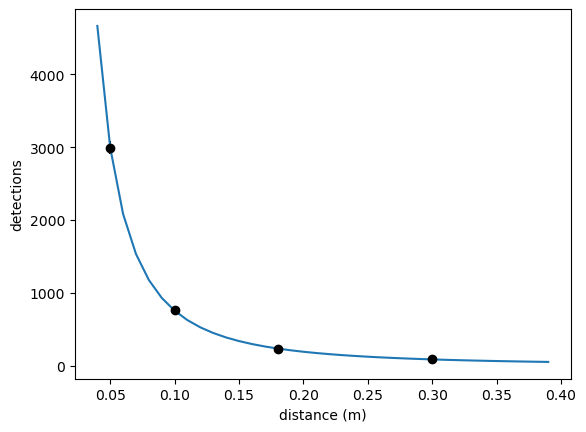

In [582]:
plt.errorbar(dis,a+b,xerr=e_dis,yerr=(e+f),fmt='ko')
dtest=np.arange(0.04,0.4,0.01)
a_aprox=c*(dtest**alpha)
plt.plot(dtest,a_aprox)

plt.xlabel('distance (m)')
plt.ylabel('detections')


In [42]:
#number of particles per isotope

In [44]:
def numberofpart(A0,e_A0,cross,e_cross,d,e_d,decay,e_decay):
    
    numbpart=(4*A0*np.pi*(d**2))/(decay*cross)
    
    err=np.sqrt((((4*np.pi*(d**2))/(decay*cross)*e_A0)**2)+
                (((4*A0*np.pi*(d**2))/(decay*(cross**2))*e_cross)**2)+
                (((4*A0*np.pi*2*d)/(decay*cross)*e_d)**2)+
                (((4*A0*np.pi*(d**2))/((decay**2)*cross)*e_decay)**2))
    return numbpart,err

In [48]:
for i in range(4):
    
    a,b=numberofpart(np.mean(mcA01[i]),np.std(mcA01[i]),cross_section,e_cross_section,dis[i],e_dis,np.mean(mcdecay1[i]),np.std(mcdecay1[i]))
    
    print("num of particles in sample at time0 isotope 1",int(a),"±",int(b),"   detector",i+1)
   
    a,b=numberofpart(np.mean(mcA02[i]),np.std(mcA02[i]),cross_section,e_cross_section,dis[i],e_dis,np.mean(mcdecay2[i]),np.std(mcdecay2[i]))
    
    print("num of particles in sample at time0 isotope 2",int(a),"±",int(b),"   detector",i+1)
    print("")

num of particles in sample at time0 isotope 1 24820145 ± 6173603    detector 1
num of particles in sample at time0 isotope 2 5618496 ± 315615    detector 1

num of particles in sample at time0 isotope 1 23959813 ± 11990182    detector 2
num of particles in sample at time0 isotope 2 5651414 ± 585364    detector 2

num of particles in sample at time0 isotope 1 17203752 ± 7941675    detector 3
num of particles in sample at time0 isotope 2 4298783 ± 1079630    detector 3

num of particles in sample at time0 isotope 1 22882989 ± 9525080    detector 4
num of particles in sample at time0 isotope 2 5643320 ± 711425    detector 4

